### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '../tune_octupole'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()

### Load study

In [7]:
# Define study
STUDY_NAME = "injection_oct_scan_kostas"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

In [8]:

# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

### Plot

In [9]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")


In [12]:
# Interpolate missing values
df_to_plot = df_to_plot.interpolate(method="cubic", axis=1)


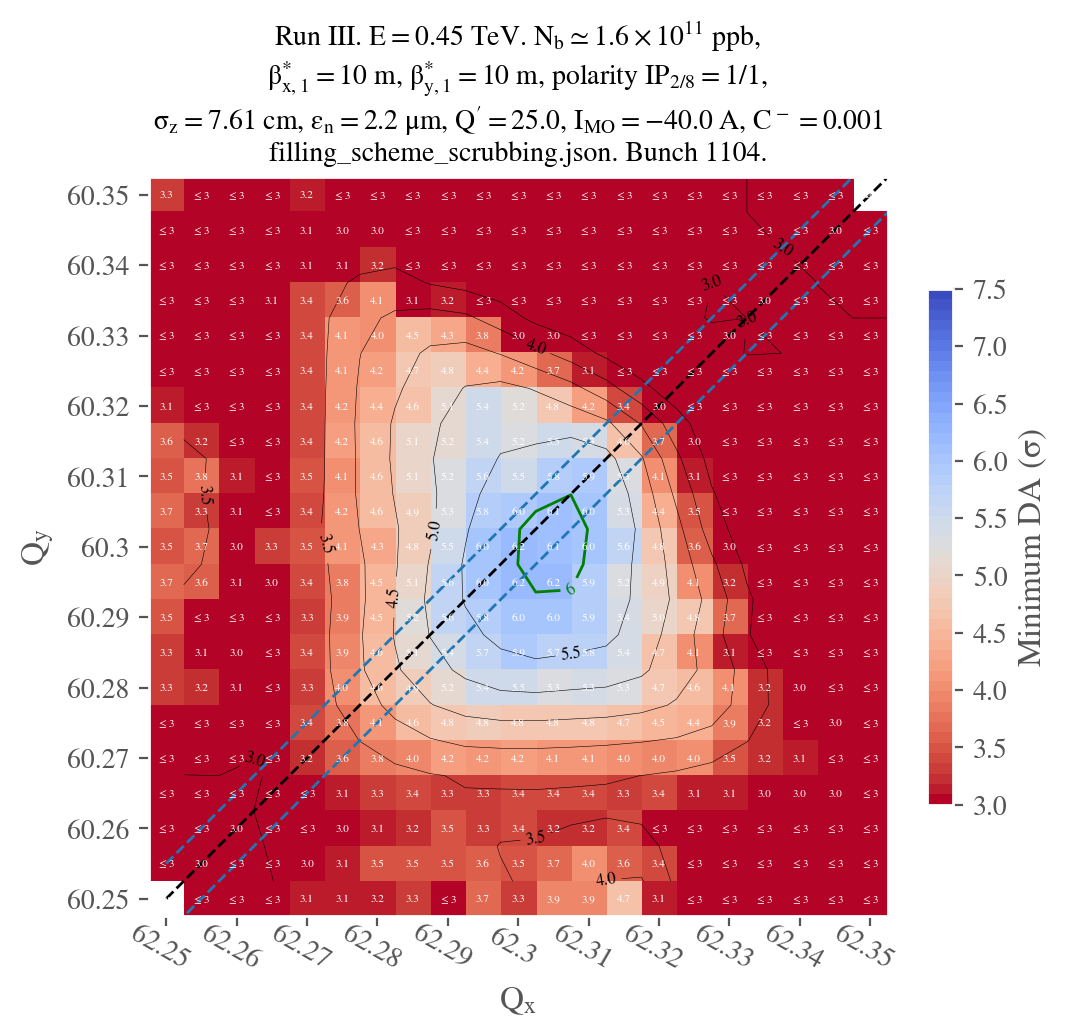

In [14]:
    # Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = r"$Q_x$"
ylabel = r"$Q_y$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx = 10,
    bety = 10,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=True,
    extended_diagonal=True,
    prevent_mask = True,
    small_delta_diagonal=True,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    vmin = 3,
    LHC_version = "Run III"
)